In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist_train = pd.read_csv("mnist_train.csv", header=None)
mnist_test = pd.read_csv("mnist_test.csv", header=None)

In [3]:
mnist_train.shape

(60000, 785)

In [4]:
mnist_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
cols = ["label"]

# делаем массив вида ["label", "px_0", "px_1", ..., "px_784"]

for i in range(784):
    cols.append("px_{}".format(i + 1))

In [6]:
mnist_train.columns = cols
mnist_test.columns = cols

In [7]:
mnist_test.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
image_size = 28

In [9]:
train_label = mnist_train["label"].values

In [10]:
type(train_label)

numpy.ndarray

In [11]:
train_label.shape


(60000,)

In [12]:
test_label = mnist_test["label"].values

In [13]:
test_label.shape

(10000,)

In [14]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [15]:
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
matrix[:, 1]

array([2, 5])

In [18]:
matrix[:, 1:]

array([[2, 3],
       [5, 6]])

In [19]:
train_images = mnist_train.values[:, 1:]

In [20]:
train_images.shape

(60000, 784)

In [21]:
test_images = mnist_test.values[:, 1:]
test_images.shape

(10000, 784)

In [22]:
train_images = train_images.reshape(60000, 28, 28)

In [23]:
test_images = test_images.reshape(10000, 28, 28)

In [24]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

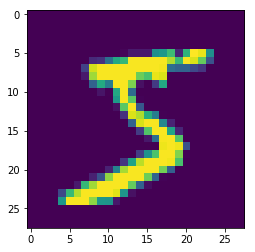

In [26]:
plt.imshow(train_images[0])

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn_classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [142]:
# fit/predict - fit(тренировка), predict(предсказание)

In [143]:
train_images.shape

(60000, 28, 28)

In [144]:
knn_classifier = knn_classifier.fit(train_images, train_label)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [145]:
knn_classifier = knn_classifier.fit(train_images.reshape(60000, 784), train_label)

In [146]:
image_id = 947

In [147]:
prediction = knn_classifier.predict(test_images[image_id].reshape(1, 784))

In [148]:
prediction

array([9])

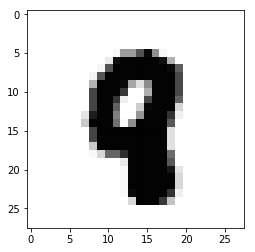

In [149]:
plt.imshow(test_images[image_id], cmap="Greys")

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
accuracy_score?

Signature: accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, optional (default=True)
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the number

In [151]:
all_predictions = knn_classifier.predict(test_images.reshape(10000, 784))

In [152]:
accuracy_score(test_label, all_predictions) * 100

97.05

In [139]:
cm = confusion_matrix(test_label, all_predictions)

In [140]:
cm

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  13,   12,  982,    2,    1,    0,    2,   17,    3,    0],
       [   0,    3,    3,  976,    1,   10,    1,    7,    6,    3],
       [   2,   11,    0,    0,  940,    0,    4,    1,    1,   23],
       [   4,    0,    0,   12,    1,  863,    6,    1,    1,    4],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   27,    4,    0,    2,    0,    0,  983,    0,   12],
       [   6,    4,    5,   11,    7,    9,    4,    7,  914,    7],
       [   7,    6,    3,    7,   10,    3,    1,   10,    2,  960]])

In [62]:
list(zip([1,2,3], ["I", "II", "III"]))

[(1, 'I'), (2, 'II'), (3, 'III')]

In [63]:
list(enumerate(["a", "b", "c", "d"]))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd')]

In [64]:
from sklearn.neural_network import MLPClassifier

In [118]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(784, 800), verbose=True)

In [119]:
nn_classifier = nn_classifier.fit(train_images.reshape(60000, 784), train_label)

Iteration 1, loss = 1.22537810
Iteration 2, loss = 0.20400224
Iteration 3, loss = 0.10608268
Iteration 4, loss = 0.08653447
Iteration 5, loss = 0.08834801
Iteration 6, loss = 0.08976137
Iteration 7, loss = 0.07759103
Iteration 8, loss = 0.07755297
Iteration 9, loss = 0.06684681
Iteration 10, loss = 0.08547410
Iteration 11, loss = 0.06804745
Iteration 12, loss = 0.08166026
Iteration 13, loss = 0.05842028
Iteration 14, loss = 0.06360184
Iteration 15, loss = 0.06499145
Iteration 16, loss = 0.05658377
Iteration 17, loss = 0.06398398
Iteration 18, loss = 0.04851274
Iteration 19, loss = 0.06273268
Iteration 20, loss = 0.07713420
Iteration 21, loss = 0.06478909
Iteration 22, loss = 0.05900441
Iteration 23, loss = 0.05377037
Iteration 24, loss = 0.04705619
Iteration 25, loss = 0.05327580
Iteration 26, loss = 0.05383949
Iteration 27, loss = 0.06686081
Iteration 28, loss = 0.06503481
Iteration 29, loss = 0.04969713
Iteration 30, loss = 0.06214432
Iteration 31, loss = 0.03555376
Iteration 32, los

In [120]:
image_id = 123

In [121]:
prediciton = nn_classifier.predict(test_images[image_id].reshape(1, 784))

In [122]:
prediction

array([9])

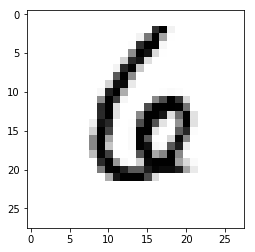

In [123]:
plt.imshow(test_images[image_id], cmap="Greys")

In [124]:
all_predictions = nn_classifier.predict(test_images.reshape(10000, 784))

In [125]:
accuracy_score(test_label, all_predictions) * 100

97.75

In [128]:
cm = confusion_matrix(test_label, all_predictions)

In [129]:
cm

array([[ 966,    0,    0,    0,    0,    3,    4,    2,    4,    1],
       [   2, 1120,    1,    2,    1,    2,    1,    2,    4,    0],
       [   3,    0, 1010,    4,    3,    0,    1,    4,    7,    0],
       [   0,    0,    2,  980,    0,    7,    0,    7,    6,    8],
       [   0,    1,    5,    0,  941,    0,    5,    4,    3,   23],
       [   2,    0,    0,    5,    0,  877,    3,    2,    1,    2],
       [   1,    3,    0,    1,    0,    5,  947,    1,    0,    0],
       [   1,    3,    8,    0,    3,    0,    0, 1007,    4,    2],
       [   3,    0,    2,    1,    6,    3,    3,    4,  945,    7],
       [   2,    1,    0,    2,    5,    5,    0,    8,    4,  982]])

Prediction: 9


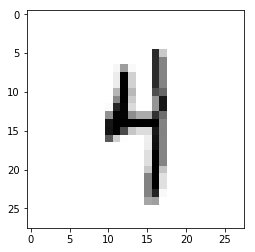

Prediction: 2


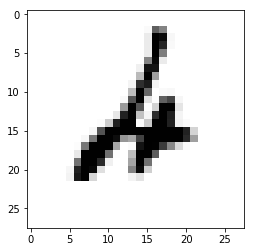

Prediction: 9


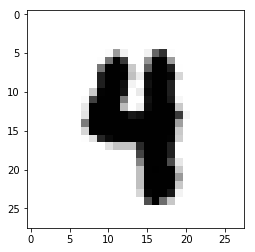

Prediction: 9


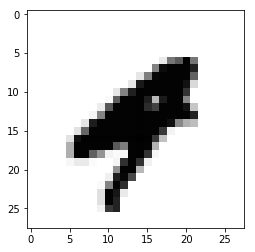

Prediction: 9


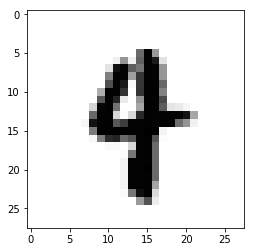

Prediction: 9


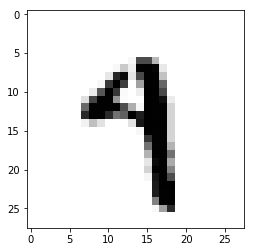

Prediction: 9


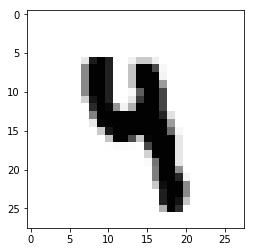

Prediction: 6


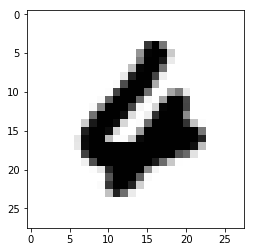

Prediction: 9


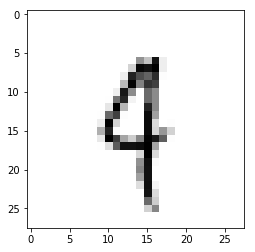

Prediction: 6


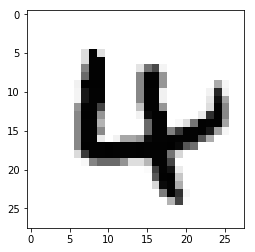

Prediction: 2


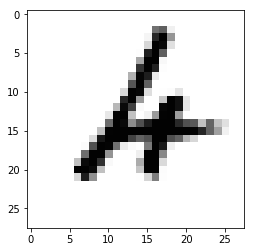

Prediction: 2


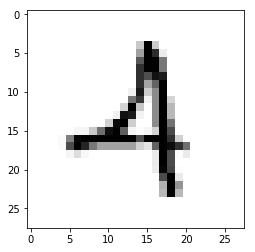

Prediction: 6


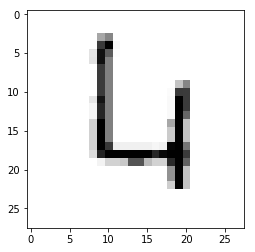

Prediction: 8


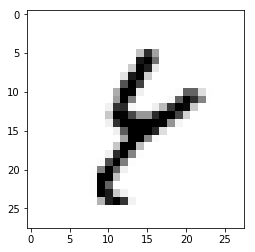

Prediction: 9


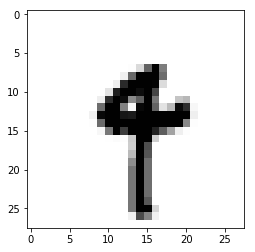

Prediction: 9


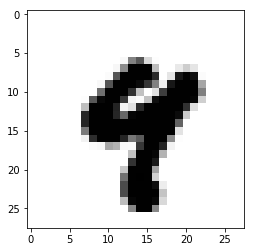

Prediction: 9


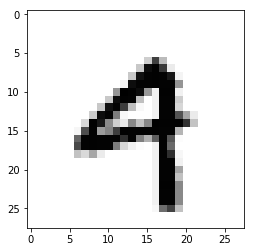

Prediction: 9


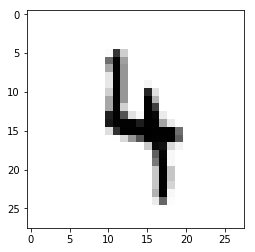

Prediction: 9


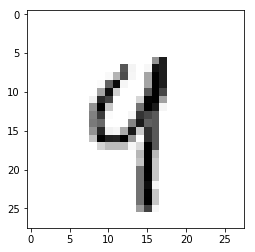

Prediction: 7


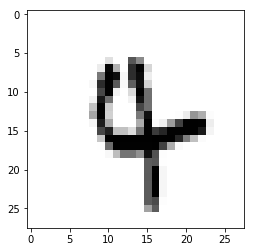

Prediction: 9


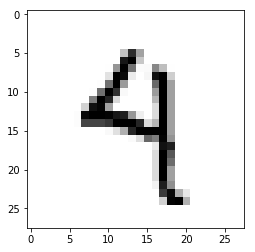

Prediction: 9


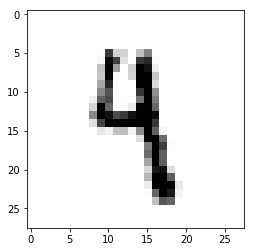

Prediction: 9


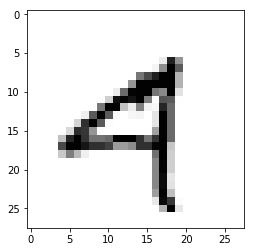

Prediction: 9


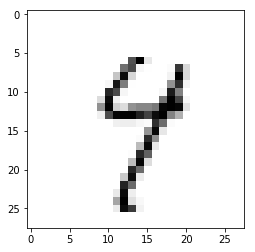

Prediction: 2


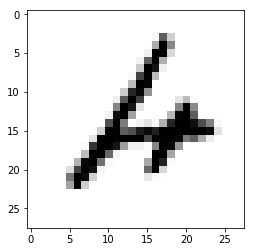

Prediction: 9


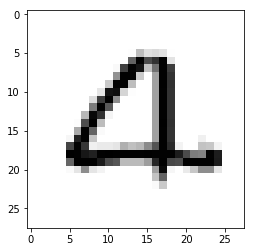

Prediction: 9


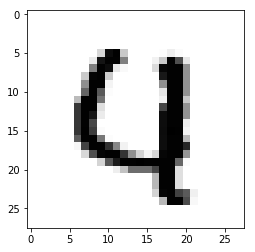

Prediction: 7


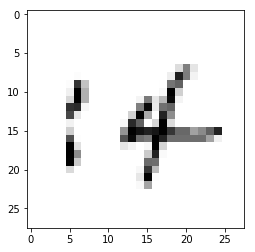

Prediction: 7


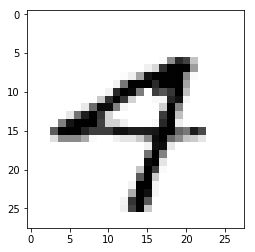

Prediction: 9


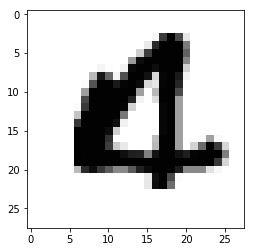

Prediction: 9


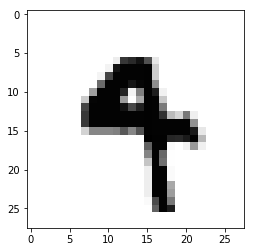

Prediction: 7


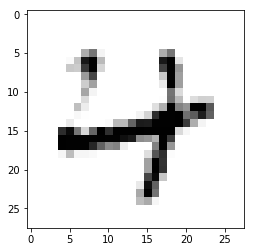

Prediction: 6


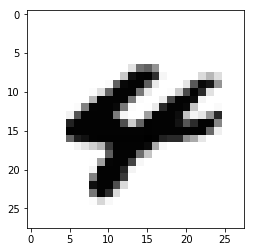

Prediction: 8


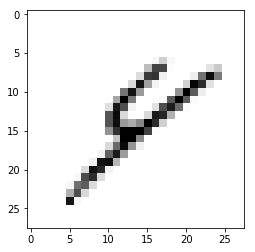

Prediction: 8


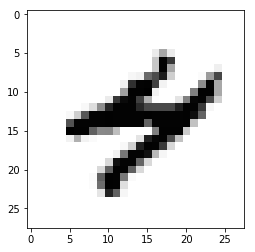

Prediction: 9


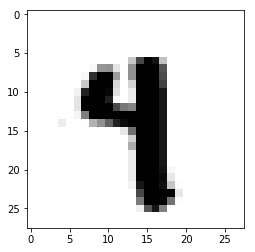

Prediction: 9


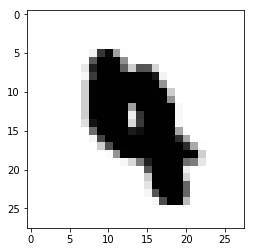

Prediction: 6


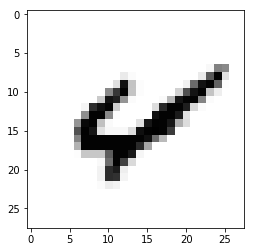

Prediction: 9


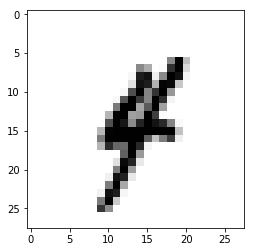

Prediction: 2


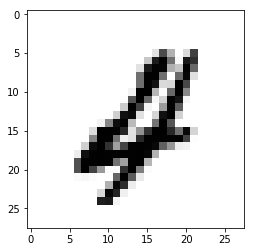

Prediction: 1


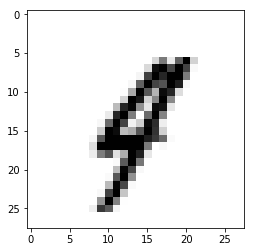

In [130]:
for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
    if real == 4 and real != pred:
        print("Prediction: " + str(pred))
        plt.imshow(test_images[i], cmap="Greys")
        plt.show()